In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

import spacy
from collections import Counter
from string import punctuation
from string import digits

pd.set_option('display.max_columns', None)
SEED = 2022

In [205]:
# !python -m spacy download en_core_web_sm

## load file

In [222]:
root = 'yelp_sample'

In [223]:
review = pd.read_csv(root + '/' + 'final_review_pa.csv', encoding = 'latin1')
business = pd.read_csv(root + '/' + 'business.csv')
interest = pd.read_csv(root + '/' + 'interest.csv')
hotwords = pd.read_csv(root + '/' + 'hotwords.csv')


In [224]:
review.shape

(588270, 9)

In [242]:
df = pd.DataFrame()

df = review.merge(business, how = 'left', on = 'business_id')
df = df.merge(hotwords, how = 'left', on = 'review_id')
df = df.merge(interest, how = 'left', on = 'user_id')

df = df.drop(columns = ['useful', 'funny', 'cool', 'date', 'name', 'address',\
                  'postal_code', 'review_count', 'is_open', 'attributes',\
                  'hours'])

df = df.rename(columns = {'categories_x': 'categories',
                          'categories_y': 'interests'})

df.head(3)

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ   
2  Xs8Z8lmKkosqW5mw_sVAoA  IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg   

   stars_x                                               text          city  \
0      3.0  If you decide to eat here, just be aware it is...   North Wales   
1      4.0  Good food--loved the gnocchi with marinara\nth...  Philadelphia   
2      5.0  My absolute favorite cafe in the city. Their b...  Philadelphia   

  state   latitude  longitude  stars_y  \
0    PA  40.210196 -75.223639      3.0   
1    PA  39.949529 -75.152139      3.5   
2    PA  39.944609 -75.157833      4.0   

                                          categories  Unnamed: 0_x  \
0  Restaurants, Breakfast & Brunch, Food, Juice B...             0   
1                 Pizza, Restaurants, Italian, Salad             1   
2             Food, Cafes, Coffee & Tea, Restaurants             2   

                                            hotwords  Unnamed: 0_y  index  \
0  aware hours beginning end multiple times locat...         21276  21276   
1  good food gnocchi marinara baked eggplant appe...         23737  23737   
2  level perfect absolute favorite cafe city blac...          8213   8213   

                                           interests  
0           Restaurants  Breakfast & Brunch  Food...  
1                          Pizza  Restaurants  It...  
2                      Food  Cafes  Coffee & Tea ...

## Define functions

In [243]:
# convert text col to lowercase

def to_lower(df, col):
    df[col] = df[col].str.lower()
    return df

#### to generate hotwords
run once only

In [245]:
# nlp = spacy.load("en_core_web_sm")

In [246]:
# def get_hotwords(text, top_k):
#     result = []
#     output = ''
#     pos_tag = ['PROPN', 'ADJ', 'NOUN'] 
#     doc = nlp(text.lower()) 
#     for token in doc:
#         if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
#             continue
#         if(token.pos_ in pos_tag):
#             result.append(token.text)
            
#     most_common_list = Counter(result).most_common(top_k)
    
#     for item in most_common_list:
#           output += item[0] + ' '

    
#     return output

In [247]:
# new_text = df['text'][0]

In [248]:
# get_hotwords(new_text, top_k = 20)

In [219]:
# %%time
# df['hotwords'] = df["text"].apply(get_hotwords, top_k = 30)
# df.head()

CPU times: user 3h 28min 39s, sys: 21min 29s, total: 3h 50min 9s
Wall time: 4h 9min 32s


review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ   
2  Xs8Z8lmKkosqW5mw_sVAoA  IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg   
3  J-4NdnDZ0pUQaUEEwDI9KQ  vrKkXsozqqecF3CW4cGaVQ  rjuWz_AD3WfXJc03AhIO_w   
4  G_5UczbCBJriUAbxz3J7Tw  clWLI5OZP2ad25ugMVI8gg  x4XdNhp0Xn8lOivzc77J-g   

   stars_x  useful  funny  cool  \
0      3.0       0      0     0   
1      4.0       0      0     0   
2      5.0       0      0     0   
3      5.0       2      2     2   
4      5.0       0      0     0   

                                                text                 date  \
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1  Good food--loved the gnocchi with marinara\nth...  2009-10-14 19:57:14   
2  My absolute favorite cafe in the city. Their b...  2014-11-12 15:30:27   
3  I thoroughly enjoyed the show.  Chill way to s...  2012-12-04 16:46:20   
4  Best thai food in the area.  Everything was au...  2013-08-15 15:27:51   

                           name                    address          city  \
0  Turning Point of North Wales        1460 Bethlehem Pike   North Wales   
1                     LaScala's            615 Chestnut St  Philadelphia   
2               Good Karma Cafe                928 Pine St  Philadelphia   
3                   The N Crowd  111 S Independence Mall E  Philadelphia   
4         Thai Place Restaurant       700 Nutt Rd, Ste 730  Phoenixville   

  state postal_code   latitude  longitude  stars_y  review_count  is_open  \
0    PA       19454  40.210196 -75.223639      3.0           169        1   
1    PA       19106  39.949529 -75.152139      3.5           367        0   
2    PA       19107  39.944609 -75.157833      4.0           249        1   
3    PA       19106  39.949756 -75.148062      4.5            90        1   
4    PA       19460  40.132635 -75.533226      4.5           222        1   

                                          attributes  \
0  {'NoiseLevel': "u'average'", 'HasTV': 'False',...   
1  {'RestaurantsReservations': 'True', 'BYOBCorka...   
2  {'Alcohol': "u'none'", 'RestaurantsReservation...   
3  {'RestaurantsPriceRange2': '1', 'BusinessParki...   
4  {'OutdoorSeating': 'False', 'RestaurantsDelive...   

                                          categories  \
0  Restaurants, Breakfast & Brunch, Food, Juice B...   
1                 Pizza, Restaurants, Italian, Salad   
2             Food, Cafes, Coffee & Tea, Restaurants   
3  Performing Arts, Arts & Entertainment, Nightli...   
4                                  Thai, Restaurants   

                                               hours  \
0  {'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'...   
1  {'Monday': '0:0-0:0', 'Tuesday': '11:30-21:0',...   
2  {'Monday': '7:0-17:0', 'Tuesday': '7:0-17:0', ...   
3     {'Monday': '0:0-0:0', 'Friday': '19:15-21:15'}   
4  {'Tuesday': '17:0-21:30', 'Wednesday': '17:0-2...   

                                            hotwords  
0  aware hours beginning end multiple times locat...  
1  good food gnocchi marinara baked eggplant appe...  
2  level perfect absolute favorite cafe city blac...  
3                            chill way friday night   
4           best thai food area authentic delicious

In [250]:
# # to save generated hotwords as csv
# hotwords = df[['review_id', 'hotwords']]
# hotwords.to_csv('hotwords.csv')

## Data profiling & cleaning

In [255]:
# no of unique business
df['business_id'].nunique()

32223

In [256]:
# no of unique user
df['user_id'].nunique()

26763

In [257]:
df.groupby(['user_id'])['business_id'].size().sum()

588270

In [258]:
# no of unique review
df['text'].nunique()

586925

In [259]:
# remove rows where categories is na
df = df[df['categories'].notna()]
df.shape

(588219, 16)

In [261]:
# convert text and categories col to lowercase
df = to_lower(df, col = 'text')
df = to_lower(df, col = 'categories')
df = to_lower(df, col = 'interests')

df.head()

review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  8JFGBuHMoiNDyfcxuWNtrA  smOvOajNG0lS4Pq7d8g4JQ  RZtGWDLCAtuipwaZ-UfjmQ   
2  Xs8Z8lmKkosqW5mw_sVAoA  IQsF3Rc6IgCzjVV9DE8KXg  eFvzHawVJofxSnD7TgbZtg   
3  J-4NdnDZ0pUQaUEEwDI9KQ  vrKkXsozqqecF3CW4cGaVQ  rjuWz_AD3WfXJc03AhIO_w   
4  G_5UczbCBJriUAbxz3J7Tw  clWLI5OZP2ad25ugMVI8gg  x4XdNhp0Xn8lOivzc77J-g   

   stars_x                                               text          city  \
0      3.0  if you decide to eat here, just be aware it is...   North Wales   
1      4.0  good food--loved the gnocchi with marinara\nth...  Philadelphia   
2      5.0  my absolute favorite cafe in the city. their b...  Philadelphia   
3      5.0  i thoroughly enjoyed the show.  chill way to s...  Philadelphia   
4      5.0  best thai food in the area.  everything was au...  Phoenixville   

  state   latitude  longitude  stars_y  \
0    PA  40.210196 -75.223639      3.0   
1    PA  39.949529 -75.152139      3.5   
2    PA  39.944609 -75.157833      4.0   
3    PA  39.949756 -75.148062      4.5   
4    PA  40.132635 -75.533226      4.5   

                                          categories  Unnamed: 0_x  \
0  restaurants, breakfast & brunch, food, juice b...             0   
1                 pizza, restaurants, italian, salad             1   
2             food, cafes, coffee & tea, restaurants             2   
3  performing arts, arts & entertainment, nightli...             3   
4                                  thai, restaurants             4   

                                            hotwords  Unnamed: 0_y  index  \
0  aware hours beginning end multiple times locat...         21276  21276   
1  good food gnocchi marinara baked eggplant appe...         23737  23737   
2  level perfect absolute favorite cafe city blac...          8213   8213   
3                            chill way friday night          25064  25064   
4           best thai food area authentic delicious          17174  17174   

                                           interests  
0           restaurants  breakfast & brunch  food...  
1                          pizza  restaurants  it...  
2                      food  cafes  coffee & tea ...  
3           performing arts  arts & entertainment...  
4                                           thai ...

### category

In [262]:
# get list of business categories
business_cats=', '.join(df['categories'])

cats=pd.DataFrame(business_cats.split(','),columns=['category'])
cats.head()

category
0              restaurants
1       breakfast & brunch
2                     food
3   juice bars & smoothies
4           american (new)

In [263]:
# rank categories by appearing frequency
cats_rank = cats.category.value_counts().sort_values(ascending = False)
print("There are ",len(cats_rank)," different types/categories of Businesses in Yelp!")

There are  1148  different types/categories of Businesses in Yelp!


In [264]:
# top categories
cats_rank.iloc[:60]

 restaurants                  431981
 food                         164492
 nightlife                    131851
 bars                         125599
 american (new)                92591
 american (traditional)        78927
 breakfast & brunch            72303
 sandwiches                    62717
 italian                       55110
 pizza                         52315
 coffee & tea                  44833
 shopping                      40345
 event planning & services     38454
 seafood                       33173
 chinese                       31643
 mexican                       30841
 beauty & spas                 29509
 desserts                      28655
 specialty food                28478
 burgers                       28456
 pubs                          25671
 japanese                      24644
 salad                         24002
 cafes                         23831
 bakeries                      23531
 cocktail bars                 22907
 arts & entertainment          22752
 

/Users/wanyu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


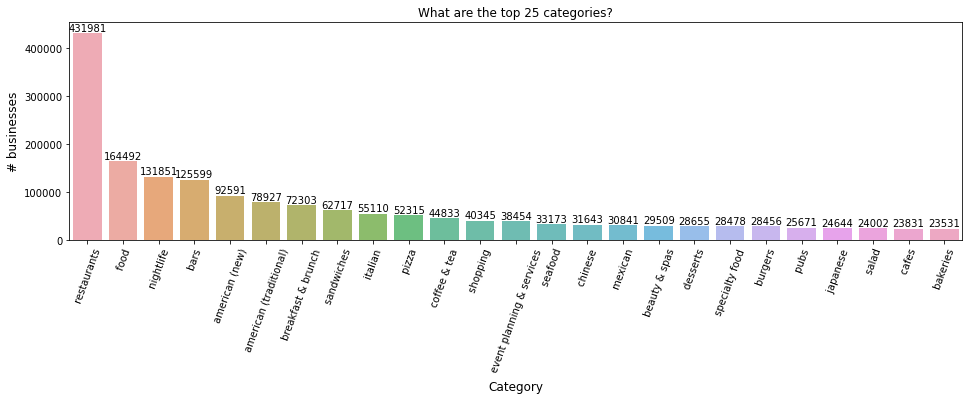

In [286]:
x = cats_rank[:25]

plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top 25 categories?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### Ranking distribution

/Users/wanyu/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


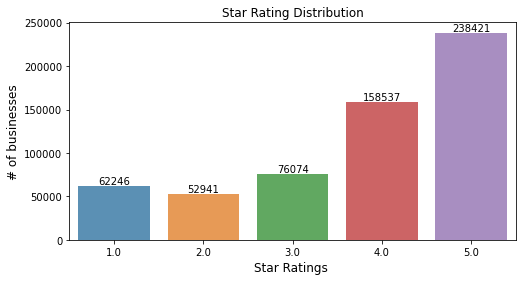

In [267]:
# ranking distribution

x=df['stars_x'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

### city

In [268]:
df.city.value_counts().sort_values(ascending = False)[:50]


Philadelphia         361659
King of Prussia        9241
West Chester           8979
Ardmore                6167
Conshohocken           5860
Wayne                  5708
Doylestown             5603
Media                  5459
Exton                  4820
Bensalem               4709
Phoenixville           4631
Willow Grove           4573
North Wales            4466
Lansdale               4397
Norristown             4385
Malvern                4204
Springfield            3895
Newtown                3827
Bryn Mawr              3663
New Hope               3596
Collegeville           3398
Havertown              3394
Langhorne              3270
Ambler                 3262
Jenkintown             3056
King Of Prussia        3052
Plymouth Meeting       2954
Glen Mills             2889
Horsham                2862
Downingtown            2855
Blue Bell              2637
Warminster             2514
Glenside               2514
Warrington             2483
Pottstown              2366
Upper Darby         

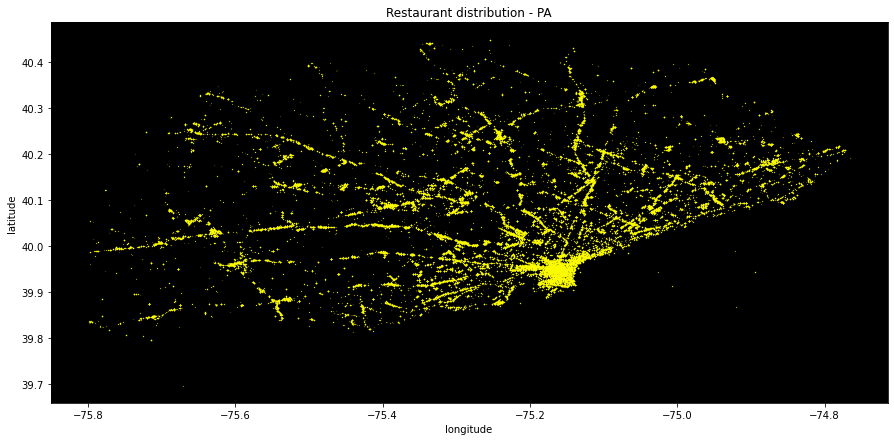

In [269]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

#Facet scatter plot
ax = df.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax)

ax[0].set_title("Restaurant distribution - PA")
ax[0].set_facecolor('black')
plt.show()

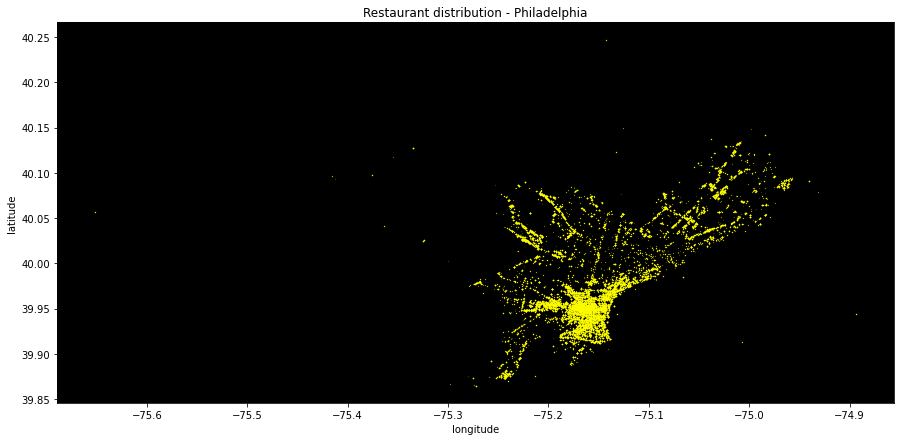

In [270]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))

x = df[df['city'] == 'Philadelphia']

#Facet scatter plot
ax = x.plot(kind='scatter', x='longitude', y='latitude',
                color='yellow', 
                s=.02, alpha=.6, subplots=True, ax=ax)

ax[0].set_title("Restaurant distribution - Philadelphia")
ax[0].set_facecolor('black')
plt.show()

### Review text

In [271]:
# average length of review text

avg_text_len = df["text"].apply(lambda x: len(str(x).split())).mean()
print("Average review length is: ", avg_text_len)

Average review length is:  111.12455565019151


In [272]:
for text in df.text[:5]:
    print(text)

if you decide to eat here, just be aware it is going to take about 2 hours from beginning to end. we have tried it multiple times, because i want to like it! i have been to it's other locations in nj and never had a bad experience. 

the food is good, but it takes a very long time to come out. the waitstaff is very young, but usually pleasant. we have just had too many experiences where we spent way too long waiting. we usually opt for another diner or restaurant on the weekends, in order to be done quicker.
good food--loved the gnocchi with marinara
the baked eggplant appetizer was very good too

the service was very slow, but despite this, i'd go back, the food is just that good
my absolute favorite cafe in the city. their black and white latte is probably the best i've ever had (not too sweet and just the right amount of foam), soups are always really good (even for non-soup people) and there's just a lot of space to do work. the noise level is perfect, the music is at a perfect lev

### wordcloud for review text

In [273]:
full_text = ''

for text in df.text:
    full_text += text

(-0.5, 2999.5, 1999.5, -0.5)

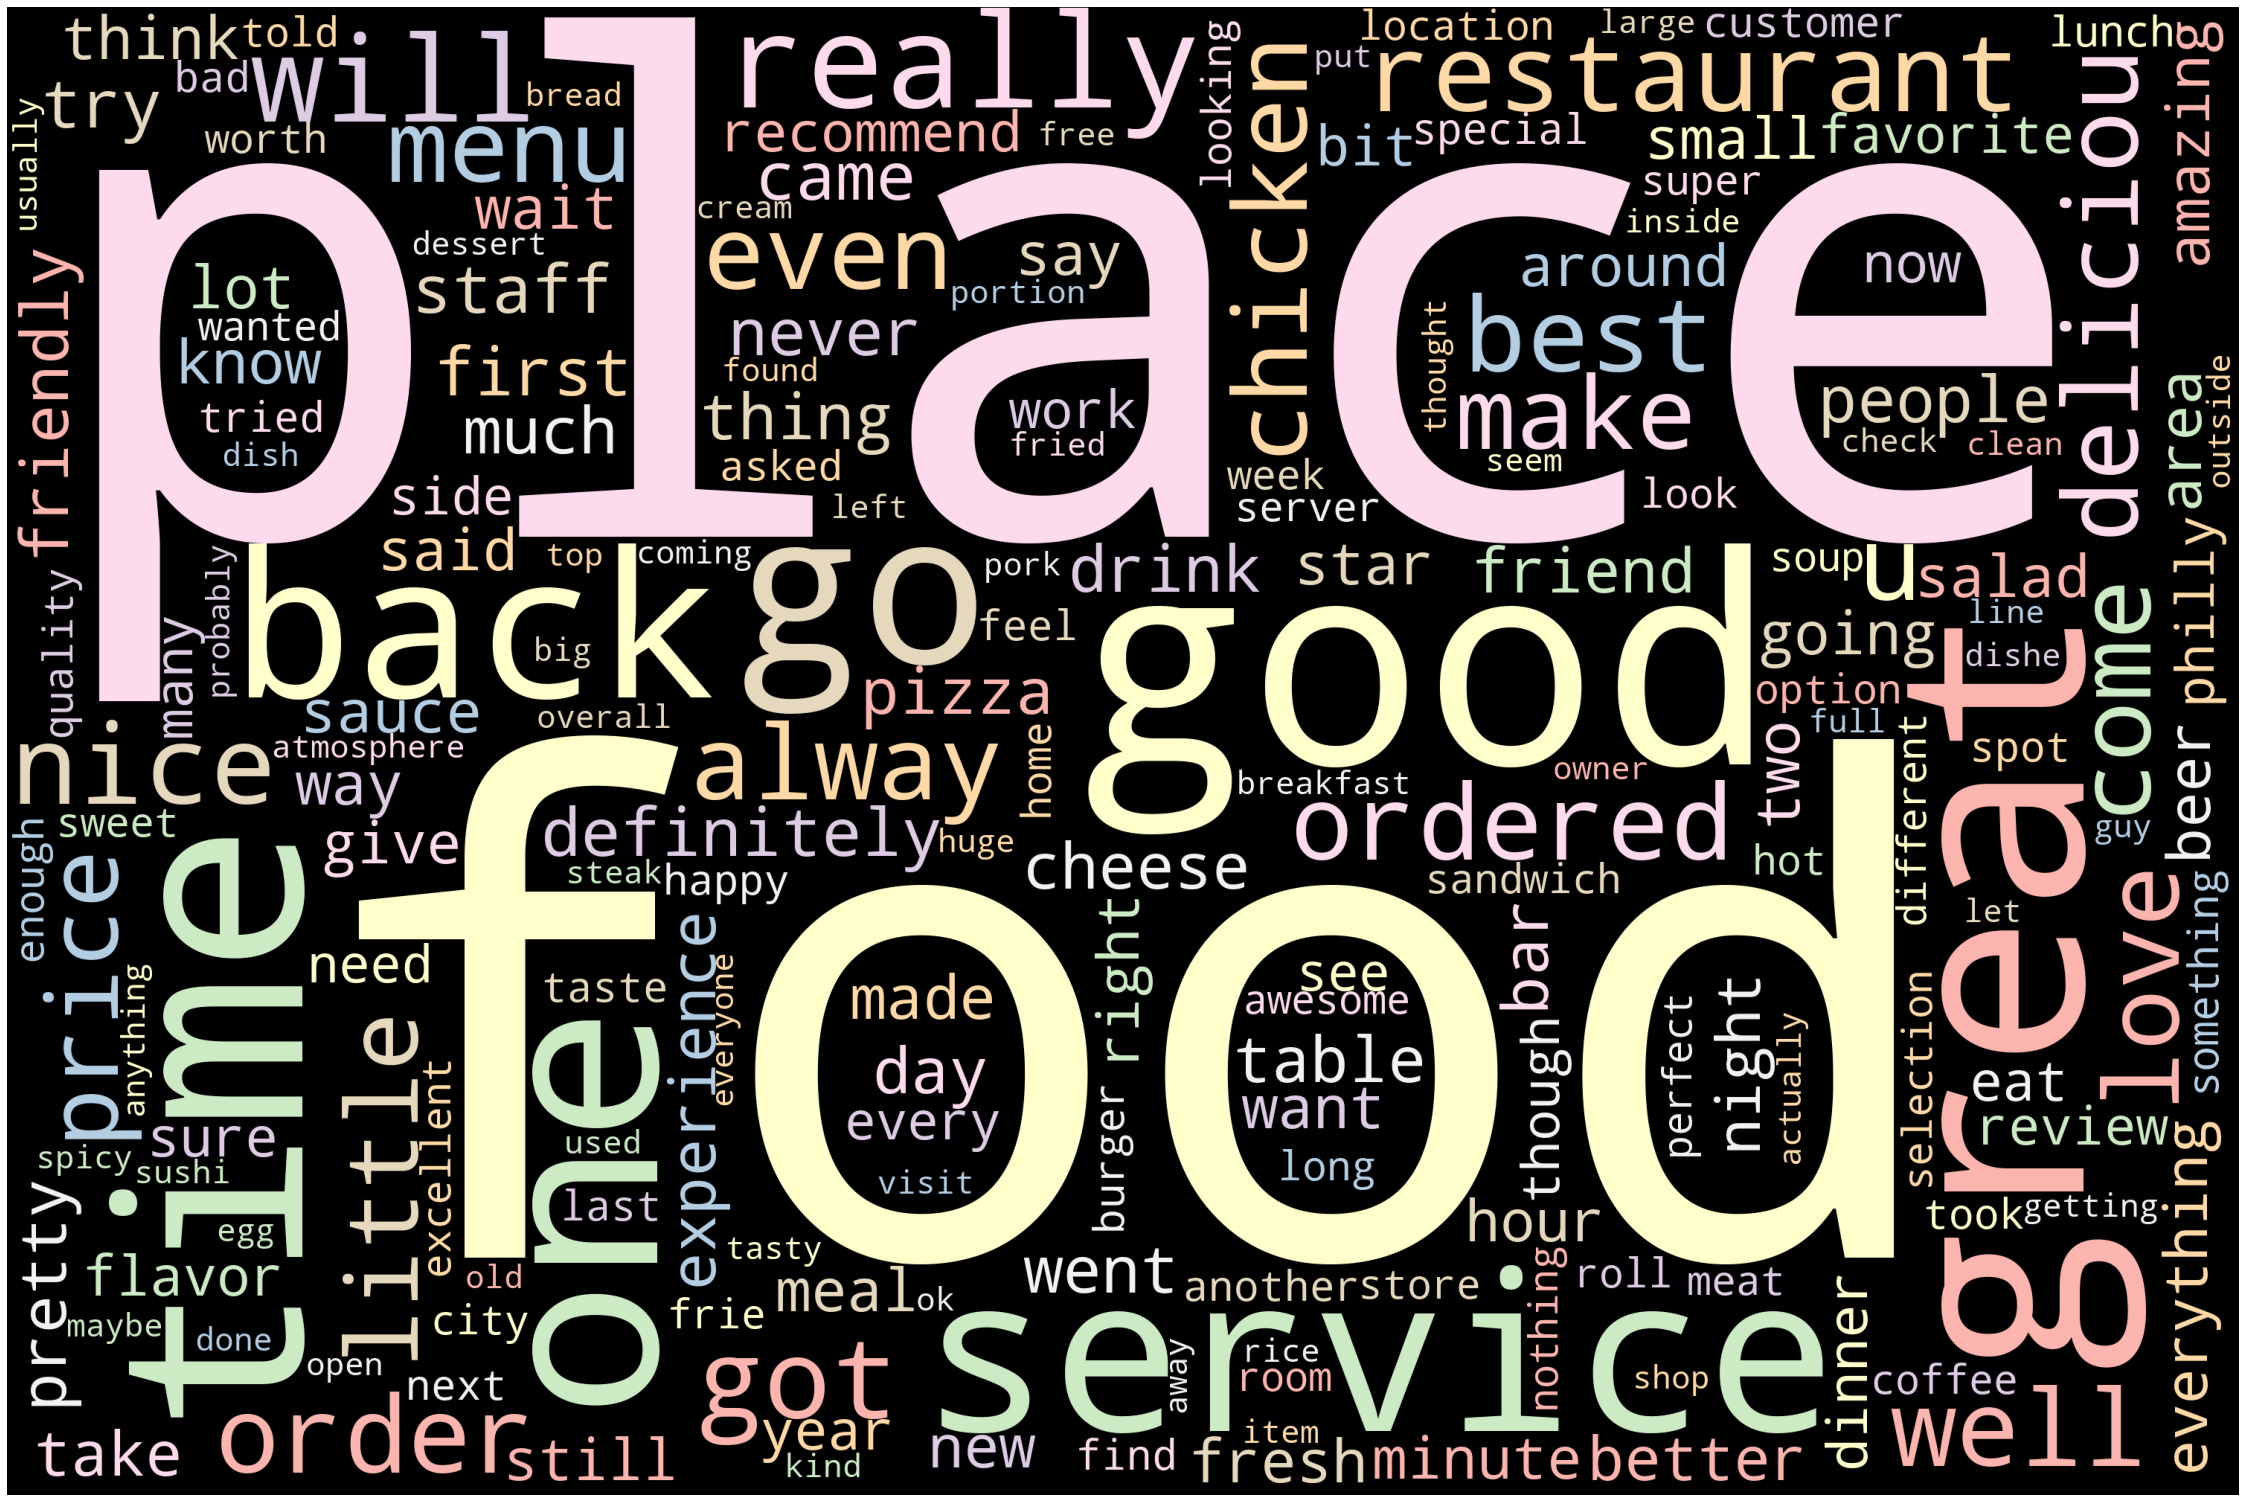

In [274]:
# Generate word cloud - original review
wordcloud = WordCloud(width= 3000, height = 2000, random_state=SEED, \
                      background_color='black', colormap='Pastel1', \
                      collocations=False, stopwords = STOPWORDS).generate(full_text)

plt.figure(figsize = (40, 30))
plt.imshow(wordcloud)
plt.axis("off")

In [278]:
### wordcloud for interest text


In [279]:
full_interest = ''

for interest in df.interests:
    full_interest += interest

(-0.5, 2999.5, 1999.5, -0.5)

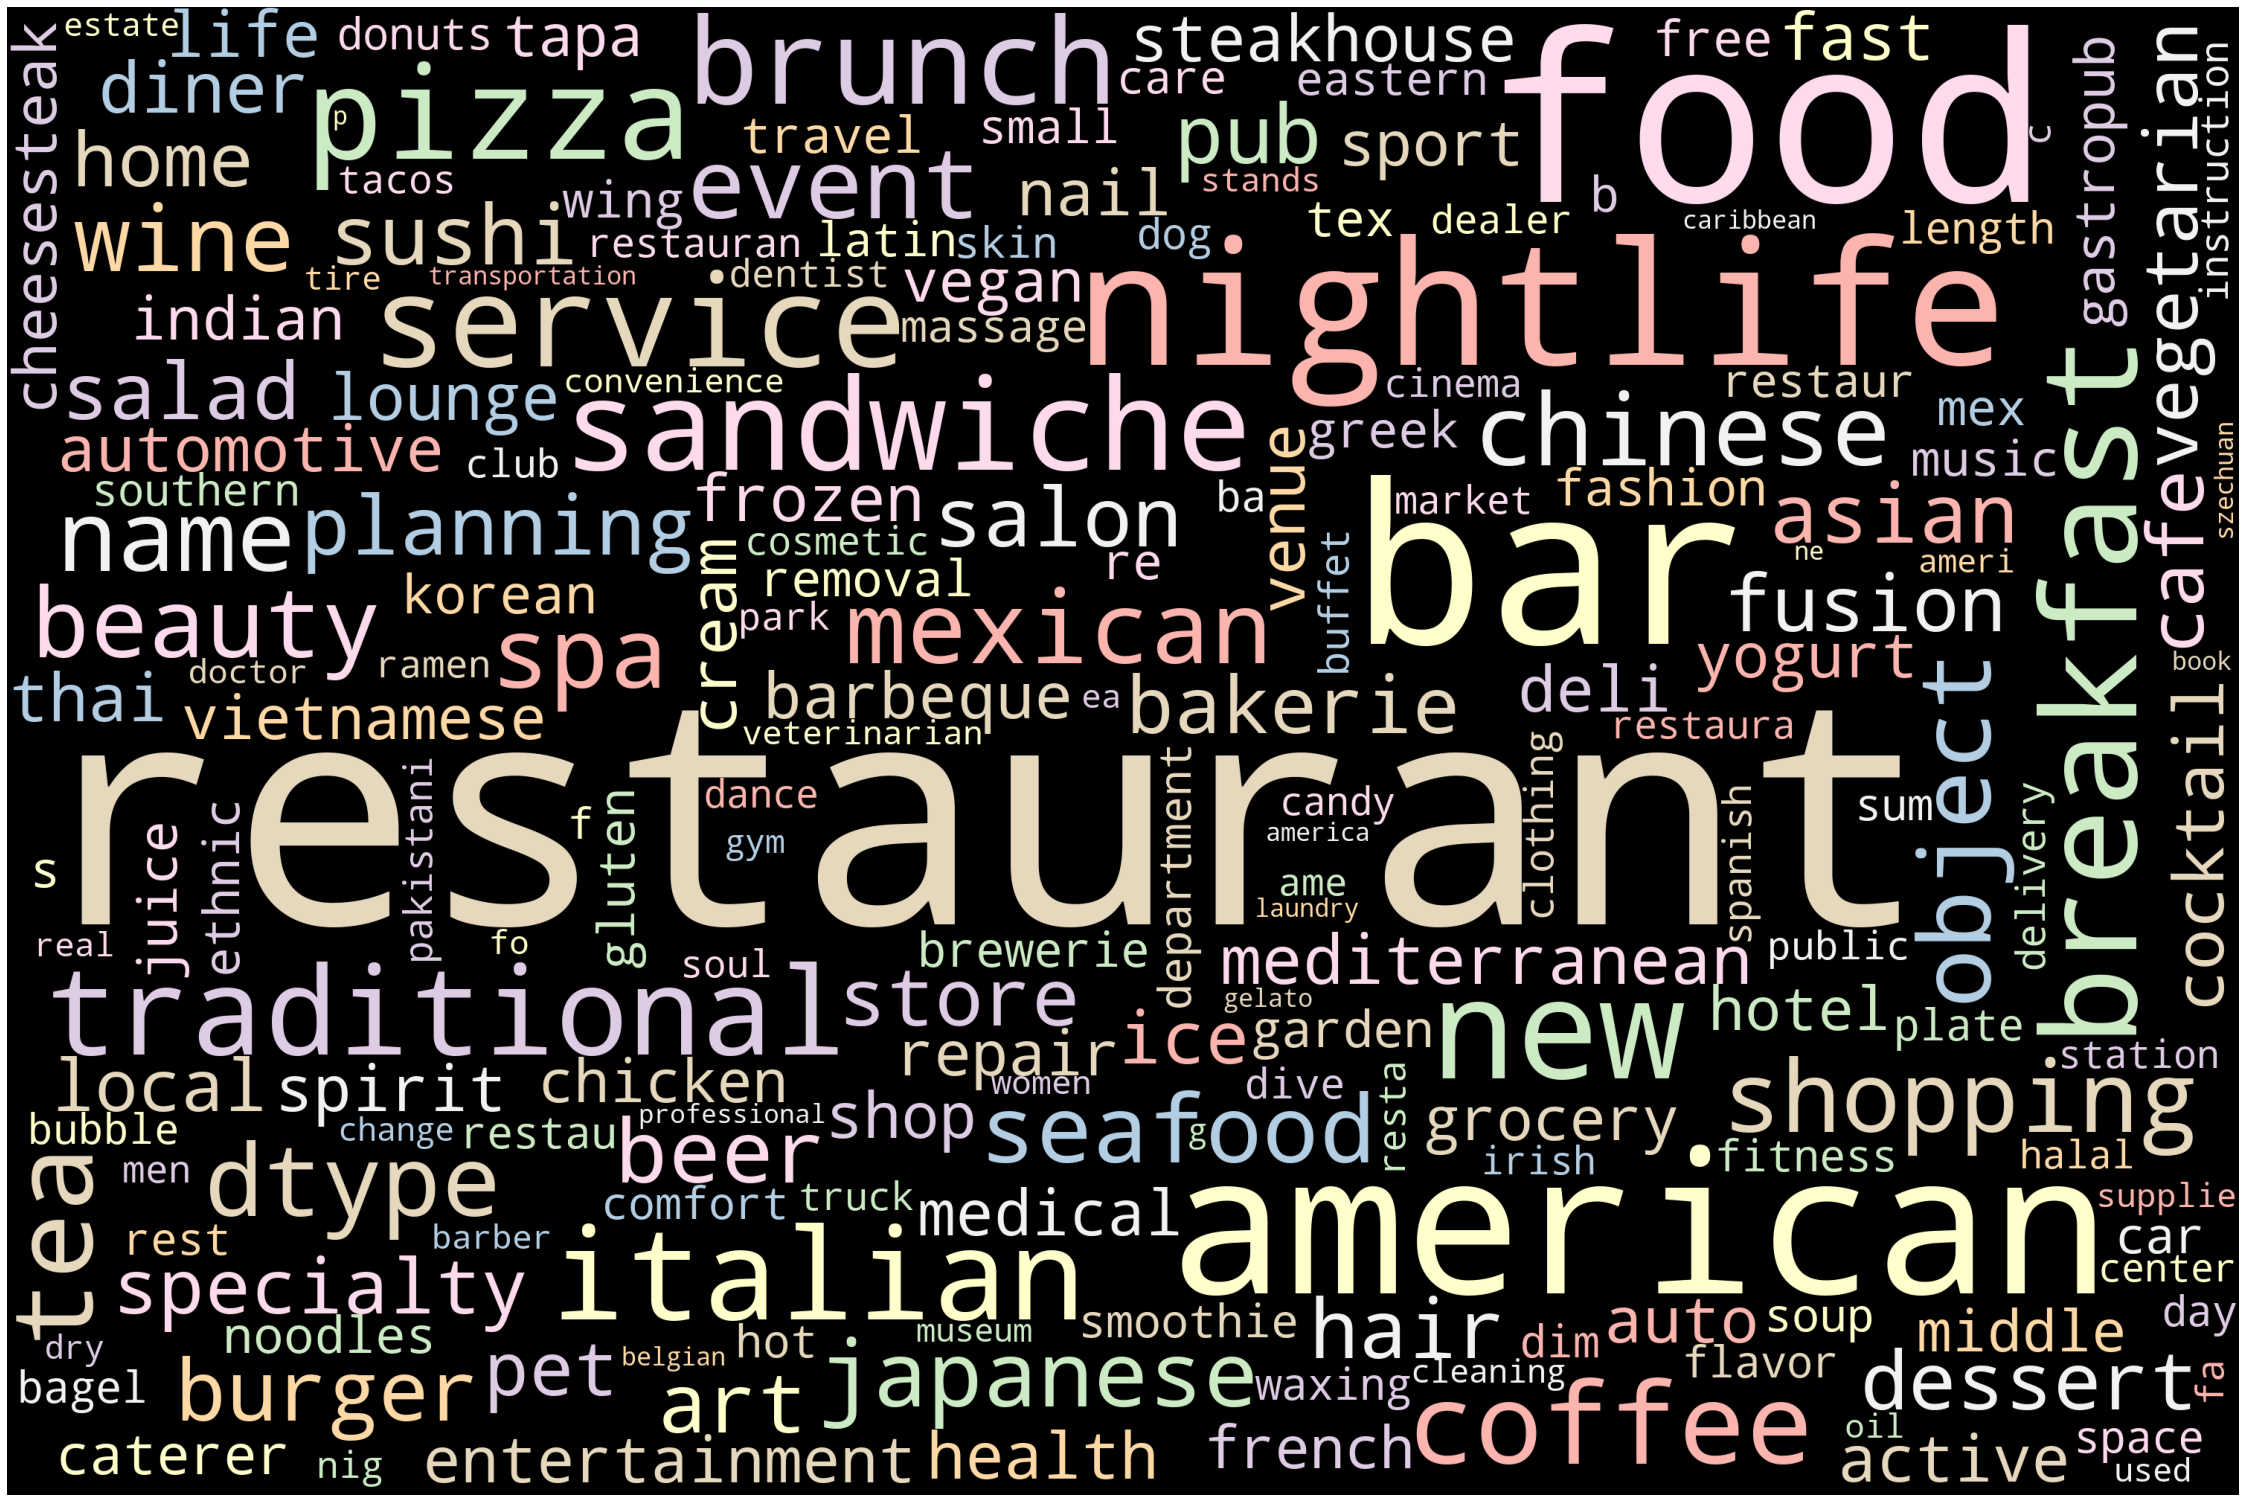

In [280]:
# Generate word cloud - interest/categories
wordcloud_int = WordCloud(width= 3000, height = 2000, random_state=SEED, \
                      background_color='black', colormap='Pastel1', \
                      collocations=False, stopwords = STOPWORDS).generate(full_interest)

plt.figure(figsize = (40, 30))
plt.imshow(wordcloud_int)
plt.axis("off")

In [283]:
### wordcloud for hotwords text
df = df.astype({'hotwords': str})

In [284]:
full_hotwords = ''

for hotwords in df.hotwords:
    full_hotwords += hotwords

(-0.5, 2999.5, 1999.5, -0.5)

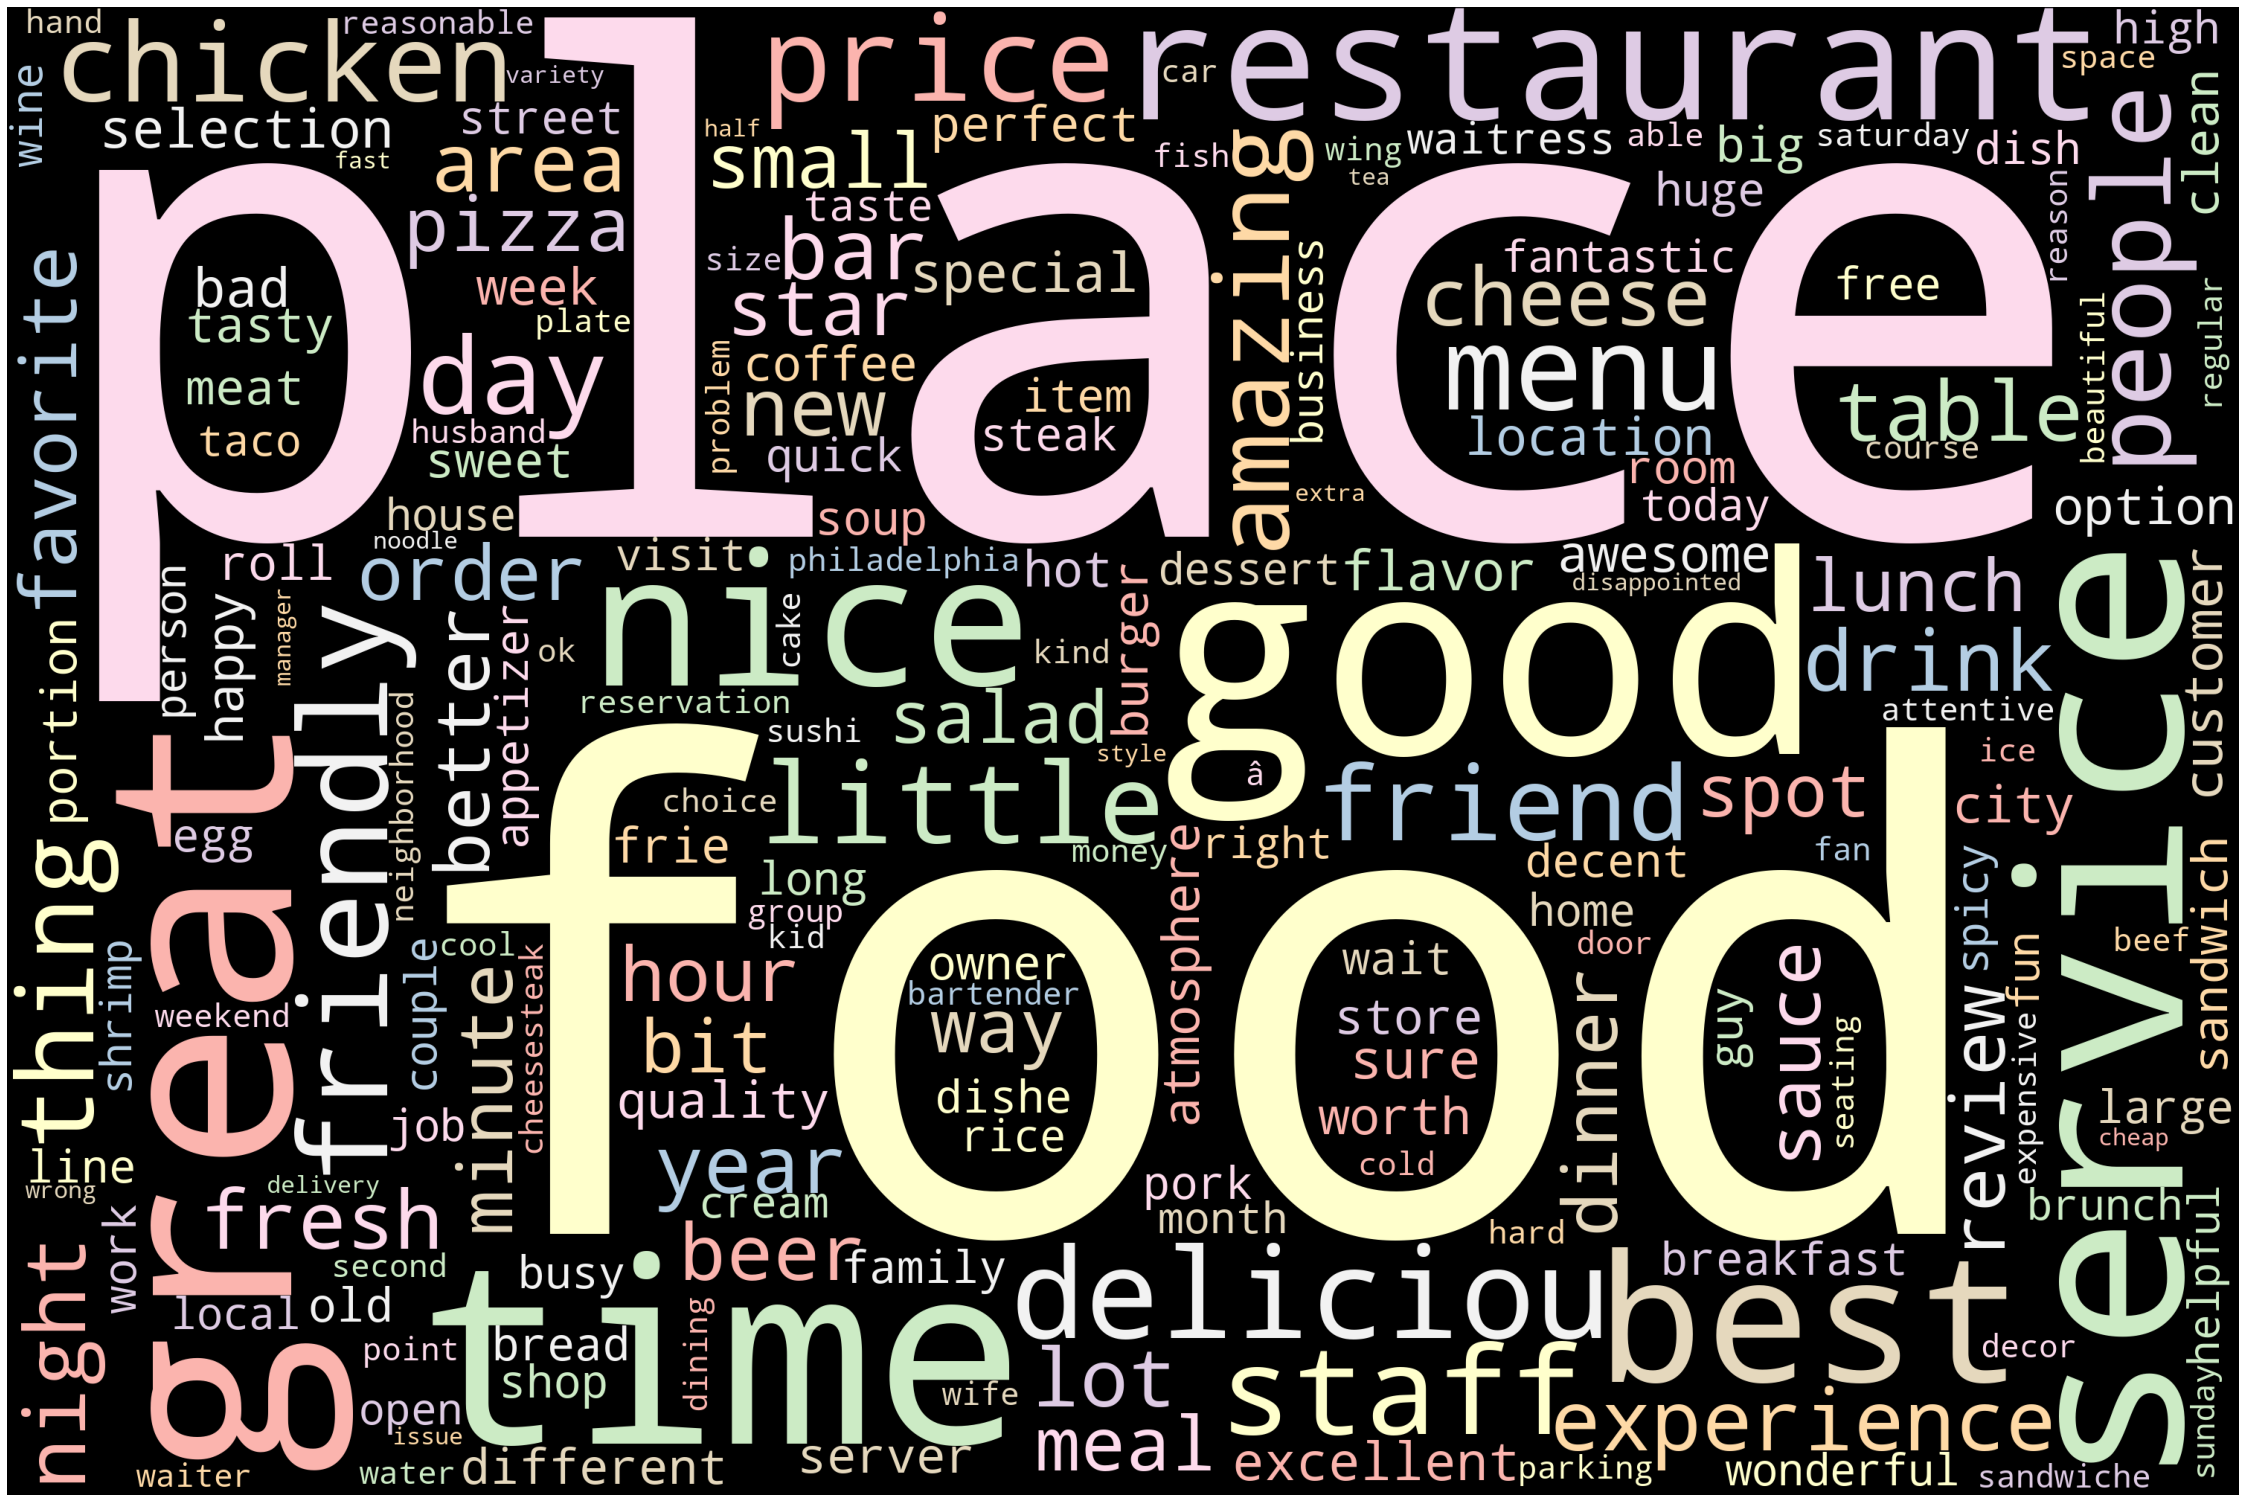

In [285]:
# Generate word cloud - hotword
wordcloud_hot = WordCloud(width= 3000, height = 2000, random_state=SEED, \
                      background_color='black', colormap='Pastel1', \
                      collocations=False, stopwords = STOPWORDS).generate(full_hotwords)

plt.figure(figsize = (40, 30))
plt.imshow(wordcloud_hot)
plt.axis("off")

In [289]:
for text in df.categories[:2]:
    print(text)

restaurants, breakfast & brunch, food, juice bars & smoothies, american (new), coffee & tea, sandwiches
pizza, restaurants, italian, salad
